In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
bankdata=pd.read_csv("https://raw.githubusercontent.com/srikanthdakoju/quiz/master/data/banklist.csv")
bankdata

Bank Name                City  \
0                                  Fayette County Bank          Saint Elmo   
1    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
2                                       First NBC Bank         New Orleans   
3                                        Proficio Bank  Cottonwood Heights   
4                        Seaway Bank and Trust Company             Chicago   
5                               Harvest Community Bank          Pennsville   
6                                          Allied Bank            Mulberry   
7                         The Woodbury Banking Company            Woodbury   
8                               First CornerStone Bank     King of Prussia   
9                                   Trust Company Bank             Memphis   
10                          North Milwaukee State Bank           Milwaukee   
11                              Hometown National Bank            Longview   
12                                 The Bank of Georgia      Peachtree City   
13                                        Premier Bank              Denver   
14                                      Edgebrook Bank             Chicago   
15                                          Doral Bank            San Juan   
16                   Capitol City Bank & Trust Company             Atlanta   
17                             Highland Community Bank             Chicago   
18                   First National Bank of Crestview            Crestview   
19                                  Northern Star Bank             Mankato   
20              Frontier Bank, FSB D/B/A El Paseo Bank         Palm Desert   
21               The National Republic Bank of Chicago             Chicago   
22                                      NBRS Financial          Rising Sun   
23                               GreenChoice Bank, fsb             Chicago   
24                            Eastside Commercial Bank             Conyers   
25                             The Freedom State Bank              Freedom   
26                                         Valley Bank     Fort Lauderdale   
27                                         Valley Bank              Moline   
28                         Slavie Federal Savings Bank             Bel Air   
29                               Columbia Savings Bank          Cincinnati   
..                                                 ...                 ...   
521                                       IndyMac Bank            Pasadena   
522                           First Integrity Bank, NA             Staples   
523                                  ANB Financial, NA         Bentonville   
524                                          Hume Bank                Hume   
525                             Douglass National Bank         Kansas City   
526                                  Miami Valley Bank            Lakeview   
527                                            NetBank          Alpharetta   
528                          Metropolitan Savings Bank          Pittsburgh   
529                                    Bank of Ephraim             Ephraim   
530                                      Reliance Bank        White Plains   
531              Guaranty National Bank of Tallahassee         Tallahassee   
532                                Dollar Savings Bank              Newark   
533                               Pulaski Savings Bank        Philadelphia   
534              First National Bank of Blanchardville      Blanchardville   
535                              Southern Pacific Bank            Torrance   
536                        Farmers Bank of Cheneyville         Cheneyville   
537                                      Bank of Alamo               Alamo   
538                         AmTrade International Bank             Atlanta   
539                       Connecticut Bank of Commerce            Stamford   
540                                   New Century Bank     Shelby T

In [11]:
print(bankdata.dtypes)
print(bankdata.isnull().any())

Bank Name                object
City                     object
ST                       object
CERT                      int64
Acquiring Institution    object
Closing Date             object
Updated Date             object
dtype: object
Bank Name                False
City                     False
ST                       False
CERT                     False
Acquiring Institution    False
Closing Date             False
Updated Date             False
dtype: bool


In [21]:
bankdata["City"].value_counts()

Chicago            18
Atlanta            10
Phoenix             6
Naples              5
Bradenton           4
Las Vegas           4
Miami               4
Alpharetta          4
Scottsdale          4
Los Angeles         4
Stockbridge         3
Tampa               3
Henderson           3
Woodstock           3
Asheville           3
Springfield         3
Birmingham          3
Baltimore           3
Milwaukee           3
Sarasota            3
Ocala               2
Macon               2
Berwyn              2
Valdosta            2
Burlington          2
Louisville          2
San Juan            2
Jacksonville        2
McDonough           2
Fort Lauderdale     2
                   ..
Albuquerque         1
Glasgow             1
Hume                1
Malta               1
Doraville           1
Cleveland           1
Loganville          1
Shorewood           1
Kingfisher          1
Saint George        1
Draper              1
Newark              1
Topeka              1
Spartanburg         1
Woodland H

<module 'seaborn' from '/home/bhargav/anaconda3/lib/python3.7/site-packages/seaborn/__init__.py'>

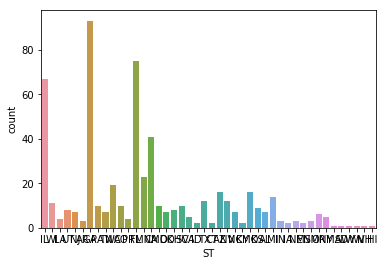

In [34]:
#states with most failed banks
plt.Figure(figsize=(10,10))
sns.countplot(x=bankdata["ST"],)
plt.pie


In [25]:
#how many states are there in data analysis
bankdata["ST"].nunique()

44

In [35]:
#top 5 states whrer most banks fail
bankdata["Bank Name"].value_counts()[:5]
bankdata["ST"].value_counts()[:5]

GA    93
FL    75
IL    67
CA    41
MN    23
Name: ST, dtype: int64

In [20]:
# top 5 aquiring banks
bankdata["Acquiring Institution"].value_counts()[:5]

No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: Acquiring Institution, dtype: int64

In [28]:
bankdata[bankdata["Acquiring Institution"]=="State Bank of Texas"]

Bank Name     City  ST   CERT  \
4            Seaway Bank and Trust Company  Chicago  IL  19328   
21   The National Republic Bank of Chicago  Chicago  IL    916   
450         Millennium State Bank of Texas   Dallas  TX  57667   

    Acquiring Institution Closing Date Updated Date  
4     State Bank of Texas    27-Jan-17    18-May-17  
21    State Bank of Texas    24-Oct-14     6-Jan-16  
450   State Bank of Texas     2-Jul-09    26-Oct-12

In [33]:
bankdata[(bankdata["Acquiring Institution"]=="State Bank of Texas") & (bankdata["ST"]=="TX")]

Bank Name    City  ST   CERT Acquiring Institution  \
450  Millennium State Bank of Texas  Dallas  TX  57667   State Bank of Texas   

    Closing Date Updated Date  
450     2-Jul-09    26-Oct-12

In [101]:
# failed bank names satrt with letter s
value1=0
value2=0
for x in bankdata["Bank Name"]:
    if x.startswith("s") or x.startswith("S"):
        value1=value1+1
    if len(x.split())==2:
        value2=value2+1
print("",value1)
print(value2)

 53
114


In [70]:
#bank data with 
bankdata[(bankdata["Acquiring Institution"]=="Western State Bank") & (bankdata["CERT"]>20000)]

Bank Name        City  ST   CERT Acquiring Institution  \
48  Central Arizona Bank  Scottsdale  AZ  34527    Western State Bank   

   Closing Date Updated Date  
48    14-May-13     7-Dec-15

In [96]:
!pip install regexp

In [81]:
import re

In [95]:
# closing with 2008
x=bankdata["Closing Date"]
val=0
for y in x:
    if "08" in y:
        val=val+1
val

25